# Определение перспективного продукта в индустрии реализации компьютерных игр

## Введение

**Целью данного исследования** является определение закономерностей на рынке компьютерных игр, определяющих успешность игры. Исследование **построено на** открытых исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах (Xbox, PlayStation и другие) до 2016 года. 

**Потребность в исследовании** обусловлена стремлением международного интернет-магазина "Стримчик", продающего компьютерные игры, спланировать рекламные кампании на 2017 года и определить потенциально популярный игровой продукт.

Иследование состоит из **следующих этапов**:

1. [Обзор данных и их предобработка](#step_1):
    * [Импорт библиотек](#step_1.1);
    * [Общая информация о данных](#step_1.2);
    * [Обработка пропусков и дубликатов, замена типа данных](#step_1.3);
    * [Расчёт суммарных продаж](#step_1.4);
    * [Вывод](#step_1.5).
2. [Исследовательский анализ данных](#step_2):
    * [Количество выходящих игр по годам](#step_2.1);
    * [Продажи по платформам](#step_2.2);
    * [Продажи по платформам в актуальный период](#step_2.3);
    * [Построение боксплотов по наиболее перспективным платформам](#step_2.4);
    * [Связь отзывов и продаж](#step_2.5);
    * [Распределение игр по жанрам](#step_2.6);
    * [Вывод](#step_2.7).
3. [Сопоставление портрета пользователя каждого региона](#step_3):
    * [Самые популярные платформы](#step_3.1);
    * [Самые популярные жанры](#step_3.2);
    * [Влияние рейтинга на продажи](#step_3.3);
    * [Вывод](#step_3.4).
4. [Проверка статистических гипотез](#step_4):
    * [Равенство средних пользовательских рейтингов платформ Xbox One и PC](#step_4.1);
    * [Различие средних пользовательских рейтингов жанров Action и Sports](#step_4.2);
    * [Вывод](#step_4.3).
5. [Общий вывод](#step_5);
6. [Рекомендации](#step_6).

В работе проведён анализ закономерностей, определяющих успешность игр. **Результатом исследования** являются рекомендации о том, какой продукт в индустрии реализации компьютерных игр является наиболее перспективным для интернет-магазина "Стримчик".

## Этап 1. Обзор данных и их предобработка <a id='step_1'></a>

### Импорт библиотек <a id='step_1.1'></a>

In [1]:
import pandas as pd
import numpy as np
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

from pymystem3 import Mystem

from scipy import stats as st

### Общая информация о данных <a id='step_1.2'></a>

In [2]:
# Прочитаем файл games.csv с информацией об играх и сохраним его в переменной games
games = pd.read_csv('C:/Users/Public/Jupyter/users.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Изучим общую информацию о датафрейме games
display.display(data=games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные представлены в виде таблицы, включающей в себя 16 715 строк и 11 столбцов. При этом 6 столбцов с числовыми данными с плавающей точкой, 5 столбцов с объектами. Разберём, какие в таблице столбцы, и какую информацию они содержат:

- [`Name`](#name) — название игры;
- [`Platform`](#platform) — платформа;
- [`Year_of_Release`](#year) — год выпуска;
- [`Genre`](#genre) — жанр игры;
- [`NA_sales`](#na_sales) — продажи в Северной Америке (миллионы долларов);
- [`EU_sales`](#eu_sales) — продажи в Европе (миллионы долларов);
- [`JP_sales`](#jp_sales) — продажи в Японии (миллионы долларов);
- [`Other_sales`](#other_sales) — продажи в других странах (миллионы долларов);
- [`Critic_Score`](#crit_score) — оценка критиков;
- [`User_Score`](#user_score) — оценка пользователей;
- [`Rating`](#rating) — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

Отметим, что есть некоторое несоответствие типа данных в ряде столбцов (например, столбцы `Year_of_Release` и `Critic_Score` должны быть целочисленными, `User_Score` - числовым с плавающей точкой). Также следует привести названия столбцов в подходящий для анализа вид (привести к нижнему регистру). Кроме того, различное количество значений в столбцах указывает на возможное наличие в таблице пропусков. Пропуски могут быть связаны с отсутствием данных в открытых источниках, либо с отсутствием данных вообще (например, игра достаточно старая, и во времена ее выхода пользователи не могли ставить рейтинг); а могут быть связаны с техническими ошибками при формировании датасета.

Подробнее изучим имеющиеся в датасете столбцы.

#### Название игры <a id='name'></a>

In [4]:
len(games['Name'].unique())

11560

У нас имеются данные по 11 560 играм.

#### Платформа <a id='platform'></a>

In [5]:
len(games['Platform'].unique())

31

In [6]:
games['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Игры, которые имеются в данных, вышли на 31 различной платформе, в том числе различных вариациях XBox, PlayStation, PersonalComputer, Wii и других.

#### Год выпуска <a id='year'></a>

In [7]:
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Игры, о которых имеется информация, вышли в период с 1980 по 2016 год.

#### Жанр <a id='genre'></a>

In [8]:
len(games['Genre'].unique())

13

In [9]:
games['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Игры представлены в следующих 12 жанрах: экшн, адвентура, файтинг, платформер, загадки, гонки, ролевые, шутер, симулятор, спорт, стратегия, разное. Для некоторых игр жанр не указан.

#### Продажи <a id='na_sales'></a> <a id='ea_sales'></a> <a id='jp_sales'></a> <a id='other_sales'></a>

In [10]:
games[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe()

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.000000,16715.000000,16715.000000,16715.000000
mean,0.263377,0.145060,0.077617,0.047342
std,0.813604,0.503339,0.308853,0.186731
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Игры продавались в Северной Америке, Европе, Японии и других странах. При этом в Северной Америке продажи принесли от 0 (игра, скорее всего, не продавалась) до 41,36 миллионов долларов; в Европе - от 0 до 28,96 миллионов долларов; в Японии - от 0 до 10,22 миллионов долларов; в других странах - от 0 до 10,57 миллионов долларов. При этом для каждой из стран разброс очень велик (стандартное отклонение существенно): для Северной Америки он выше, для Европы - чуть меньше, для Японии - еще меньше, а для других стран - самый низкий.

#### Оценка критиков и пользователей <a id='crit_score'></a> <a id='user_score'></a>

In [11]:
games[['Critic_Score']].describe()

,Critic_Score
count,8137.000000
mean,68.967679
std,13.938165
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


Оценка критиков разнится от 13 до 98 баллов за игру со средним значением в 69 баллов, близким к медианному (71 балл). Это говорит о том, что игры в Датасете представлены достаточно равномерно: от низко оцененных критиками до имеющих максимальной оценкой.

In [12]:
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Оценка пользователей разнится от 0 до 9,7 баллов за игру; при этом оценки - не целые, а десятичные числа. Также есть пропущенные значения, и есть значения "tbd". [Позже](#tbd) будет рассмотрено, что это за значение.

#### Рейтинг от ESRB <a id='rating'></a>

In [13]:
len(games['Rating'].sort_values().unique())

9

In [14]:
games['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:
* AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
* E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;
* E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;
* EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;
* K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;
* M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
* RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Источник: Портал Википедии (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board).

Также в данных имеются игры, для которых значение рейтинга пропущено.

#### Замена названия столбцов

При анализе информации об исходном датасете мы обратили внимание на то, что для дальнейшего анализа необходимо привести названия столбцов к одному (нижнему) регистру.

In [15]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все названия столбцов приведены к нижнему регистру.

### Обработка пропусков и дубликатов, замена типа данных <a id='step_1.3'></a>

#### Замена типа данных

Выше мы указали столбцы, которые требуют изменения типа данных. Перед преобразованием дадим некоторые пояснения. Нет необходимости в изменении типа данных столбцов с данными о продажах в целочисленные, поскольку они измеряются в миллионах долларов. Соответственно, значения после запятой - это тысячи долларов, которыми не хотелось бы пренебрегать при осуществлении анализа.

Необходимость в переводе оценок критиков и пользователей в целочисленные необходимо проверить. Потребность в изменении типов данных возникает в том случае, если система оценивания предполагает абсолютное целое значение; и отсутствует (оставляем значение с плавающей точкой), если оценки варьируются в небольшом интервале значений со значениями после запятой. Для того, чтобы это проверить, необходимо изучить уникальные значения в соответствующих столбцах.

In [16]:
# Уникальные значения оценок критиков
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Согласно встречающимся в столбце с оценкой критиков значениям, делаем вывод о том, что система оценивания предполагает выставление целочисленных значений от 0 до 100. Соответственно, требуется изменение типа данных в столбце.

In [17]:
# Уникальные значения оценок пользователей
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Согласно встречающимся в столбце с оценкой пользователей значениям, делаем вывод о том, что система оценивания предполагает выставление нецелочисленных значений от 0 до 10. Соответственно, изменение типа данных в столбце не требуется.

Также обратим внимание на встречающийся рейтинг tbd (to be determined)<a id='tbd'></a>. Это рейтинг, который будет определён позже, то есть на момент выгрузки данных его нет, и данное значение равносильно незаполненным значениям nan. Отличие заключается в том, что для tbd нам известно, что пользователи выставляли рейтинг игре, просто он не был вычислен системой.

Нам необходимо заменить тип данных для столбцов:

- `year_of_release`: с < float > на < int >, поскольку число года - это целочисленное значение, а не число с плавающей точкой.
- `critic_score`: с < float > на < int >, поскольку оценка критиков варьируется от 0 до 100 в целочисленном формате.
- `user_score`: с < object > на < float >, так как оценка пользователей варьируется от 0 до 10 в числовом формате с плавающей точкой.

Однако, сначала нужно обработать все пропущенные значения.

#### Обработка пропусков

Проверим данные на наличие пропусков.

In [18]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски отмечены в следующих столбцах:

- `name` (название игры);
- `year_of_release` (год выпуска);
- `genre` (жанр игры);
- `critic_score` (оценка критиков);
- `user_score` (оценка пользователей);
- `rating` (рейтинг от организации ESRB).

Также необходимо учесть значения tbd в данных с оценками пользователей (выше мы пояснили, почему они равносильны пропускам).

Изучим пропуски каждого столбца подробнее и заполним их там, где это возможно.

##### Название игры

In [19]:
games.loc[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
games['name'].isna().mean()

0.00011965300628178283

У нас имеется 2 игры, для которых нет названия. Обе игры вышли в 1993 году на платформе Sega Genesis. Одна из них была продана везде, кроме Японии, вторая - только в Японии. Возможно, это разные игры; но может быть, это одна игра. В любом случае, название этих игр мы восстановить не можем. Пропущенные значения составляют менее 1% от всех данных, поэтому мы можем их удалить. Кроме того, целью анализа является определение конкретных названий игр, являющихся перспективными, а название "Unknown" или вовсе отсутствие названия для нас неинформативно.

In [21]:
games.dropna(subset = ['name'], inplace = True)

##### Год выпуска

In [22]:
games.loc[games['year_of_release'].isna() == True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
15704,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13929,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14950,Combat Wings: The Great Battles of WWII,Wii,NaN,Simulation,0.02,0.00,0.00,0.00,NaN,NaN,NaN
9706,Rocksmith,PC,NaN,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
11455,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
2108,Suikoden III,PS2,NaN,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
12970,Drill Dozer,GBA,NaN,Platform,0.04,0.01,0.00,0.00,81.0,8.3,E


Мы видим, что по многим играм год релиза содержится в названии. Создадим список, в котором представлены все возможные годы выпуска игр. После чего в новом столбце через лемматизацию "вытащим" последние 4 символа из названия игр, так как год, как правило, мы видим в конце названия. Затем заполним пропуски года выпуска, исходя из полученных лемм, входящих в список с возможным годом выпуска.

Следует отметить, что возможны неточности при таком заполнении. К примеру, спортивные симуляторы могут иметь в названии год, следующий за годом выпуска. Либо игра могла выйти в декабре какого-то года, но в названии содержать число следующего года. Однако поскольку обработка каждого значения вручную через поисковые системы слишком трудозатратна, выбранный нами метод заполнения наиболее близок к искомому значению из возможных.

In [23]:
years = pd.Series(games.loc[games['year_of_release'].isna() != True, 'year_of_release']
         .astype('int').sort_values().unique(), name='years').astype('str')

In [24]:
m = Mystem()
name_lem = []
for i in games['name']:
    result = ''.join(m.lemmatize(i)).strip()[-4:]
    name_lem.append(result)
games['name_lem'] = name_lem

In [25]:
games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'year_of_release'] = (
games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'name_lem'])
games.drop('name_lem', axis='columns', inplace=True)

In [26]:
games['year_of_release'].isna().mean()

0.015197750254293065

Оставшиеся пропущенные значения составляют около 1,5% от всех данных, поэтому мы можем их удалить. После чего можем изменить тип данных в столбце на int.

In [27]:
games.drop(games.loc[(games['year_of_release'].isnull())].index, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')

##### Жанр игры

In [28]:
games['genre'].isna().mean()

0.0

После предыдущих шагов по обработке пропусков, в столбце с жанром игры пропусков не осталось.

##### Оценка критиков и оценка пользователей

Прежде чем мы оценим пропуски по оценкам, необходимо обработать значения tbd для оценок пользователей. Выш мы указывали на то, что по своей сути этот показатель равносилен пропущенным значениям, так как это рейтинг, которого нет на момент выгрузки данных. Соответственно, мы можем заменить его на пропущенное значение.

In [29]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

Проанализируем пропуски в столбцах с оценками игр.

In [30]:
games['critic_score'].isna().mean()

0.514308281183547

In [31]:
games['user_score'].isna().mean()

0.5460234522145938

У нас имеется около 51% с пропущенными значениями оценки критиков и около 55% с пропущенными значениями оценки пользователей. Это значительные величины. Мы не можем удалить строки, так как потеряем большой объём данных; но и восстановить данные мы не можем, так как оценка может иметь множество параметров, по которым ранжируется балл, выставляемый игре. Параметры мы не знаем. Восстанавливать значения по метрикам (даже в рамках группировок по годам и жанрам) тоже будет неверно: 2 разные игры, вышедшие в один год на одну платформу и в одном жанре, могут быть оценены абсолютно по-разному.

Попытаемся понять причины такого большого количества пропусков. Рассмотрим количество пропусков по годам.

In [32]:
critscore_nan_year = (games
                          .loc[games['critic_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )
userscore_nan_year = (games
                          .loc[games['user_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

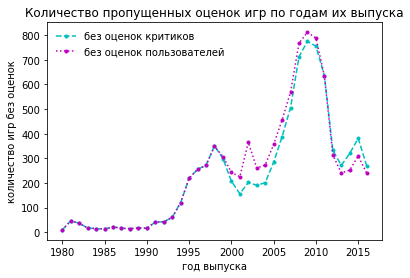

In [33]:
fig, ax = plt.subplots()
ax.set(title='Количество пропущенных оценок игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без оценок')
ax.plot(critscore_nan_year['year_of_release'], critscore_nan_year['name'], '.--c', label='без оценок критиков')
ax.plot(userscore_nan_year['year_of_release'], userscore_nan_year['name'], '.:m', label='без оценок пользователей')
ax.grid=True
ax.legend(frameon=False)
plt.show()

In [34]:
# Количество игр, у которых отсутствует оценка критиков, но есть оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()!=True)])

569

In [35]:
# Количество игр, у которых отсутствует оценка пользователей, но есть оценка критиков
len(games.loc[(games['user_score'].isna()==True) & (games['critic_score'].isna()!=True)])

1091

In [36]:
# Количество игр, у которых отсутствует и оценка критиков, и оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()==True)])

7896

##### Рейтинг от организации ESRB

In [37]:
games['rating'].isna().mean()

0.4059177349778237

У нас имеется около 41% с пропущенными значениями рейтинга. Это значительная величина. Мы не можем удалить строки, так как потеряем большой объём данных; но и восстановить данные мы не можем, так как не знаем, по какому принципу выставляется рейтинг.

Попытаемся понять причины такого большого количества пропусков. Рассмотрим количество пропусков по годам.

In [38]:
rating_nan_year = (games
                        .loc[games['rating'].isna()==True]
                        .pivot_table(index='year_of_release', values='name', aggfunc='count')
                        .reset_index()
                     )

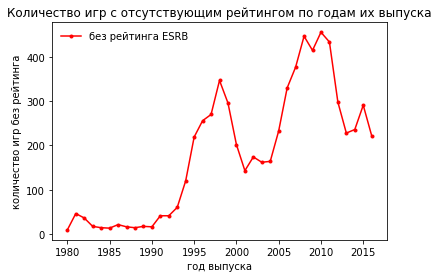

In [39]:
fig, ax = plt.subplots()
ax.set(title='Количество игр с отсутствующим рейтингом по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без рейтинга')
ax.plot(rating_nan_year['year_of_release'], rating_nan_year['name'], '.-r', label='без рейтинга ESRB')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдаем ту же динамику количества игр без рейтинга, что и количества игр без оценок. Соответственно, и причины пропусков в данных могут быть теми же.

Проверим, что заполнены все пропуски, которые могут быть заполнены.

In [40]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
dtype: int64

#### Обработка дубликатов

In [41]:
# Установим наличие дубликатов в данных
games.duplicated().sum()

0

В данных отсутствуют дубликаты.

### Расчёт суммарных продаж <a id='step_1.4'></a>

Для расчёта суммарных продаж во всех регионах по играм, создадим отдельный столбец `total_sales`, в котором просуммируем столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales`.

In [42]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод <a id='step_1.5'></a>

На этапе подготовки данных все названия столбцов были приведены к нижнему регистру; была проведена замена типа данных там, где это возможно и необходимо; были обработаны пропуски; суммарные продажи во всех регионах по играм были сведены в отдельный столбец.

Во время обработки пропусков была обнаружена интересная тенденция: количество игр, для которых нет оценки критиков по годам выпуска практически соответствовало количеству игр, для которых нет оценки пользователей, и количеству игр, для которых нет рейтинга от организации ESRB. Характерная динамика показателей может быть связана с тем, что игр стало выходить больше - соответственно, пользователи "распылились" между играми, не имея возможности оценить все из них. Также возникло большее количество платформ - часть пользователей, имеющая возможность поиграть на одной из платформ, не может позволить себе другие платформы. А некоторые из игр являются неэксклюзивными только для одной платформы, а встречаются на всех платформах, соответственно, могут быть неоценены пользователями, критиками и ESRB.

Также часть пропусков за последние годы связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже). Что касается пропусков в оценках критиков и рейтинге ESRB, возможно, часть игр также не была сведена в оценку и рейтинг на момент выгрузки (оценка и рейтинг появятся немного позже). Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игру, а наиболее ожидаемые и пользующиеся спросом игры, либо игре в целом - только на одной из платформ. Также возможно, что данные по оценкам и рейтингу отсутствуют в открытом доступе.

## Этап 2. Исследовательский анализ данных <a id='step_2'></a>

### Количество выходящих игр по годам <a id='step_2.1'></a>

In [43]:
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

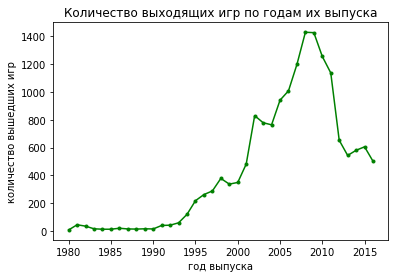

In [44]:
fig, ax = plt.subplots()
ax.set(title='Количество выходящих игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество вышедших игр')
ax.plot(games_year['year_of_release'], games_year['name'], '.-g')
ax.grid=True
plt.show()

Заметим, что в Данных очень мало игр, выпущенных с 1980 по 1990 годы. С 1990 по 2000 гг. представлено больше игр, но основной объём информации приходится на игры, вышедшие с 2000 по 2016 гг.

Таким образом, у нас имеется "хвост данных", который следует отбросить - это период до 1994 года: данные за этот период незначительные, а значит, непоказательные.

### Продажи по платформам <a id='step_2.2'></a>

Найдём TOP10 платформ с наибольшими суммарными продажами.

In [45]:
platform_popular = (games
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(6)
                        .reset_index(drop=True)
                   )
platform_popular

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58


In [46]:
# Создадим список с названием платформ из TOP10
platforms = platform_popular['platform']

Построим и изучим распределение суммарных продаж по годам для каждой из TOP10 платформ.

In [47]:
platform_year = (games
                      .loc[games['platform'].isin(platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

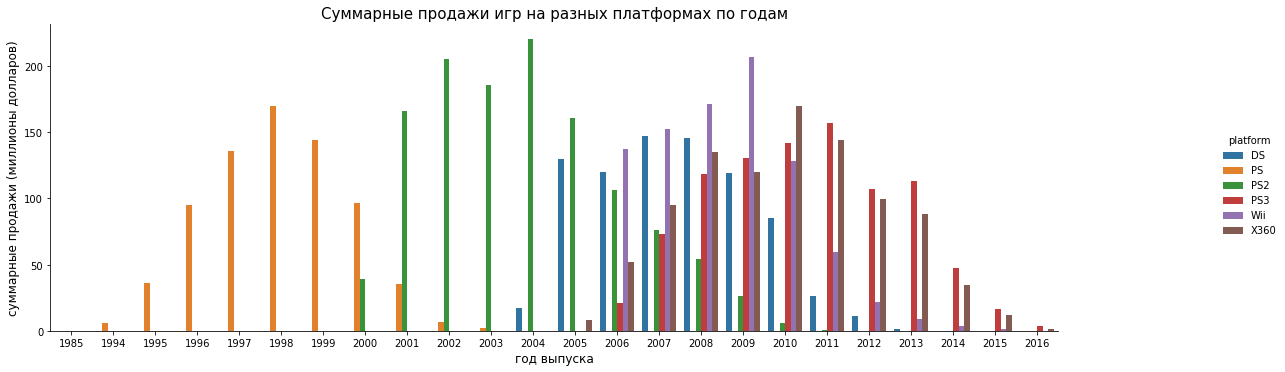

In [48]:
plot = sns.catplot("year_of_release", "total_sales", hue="platform", kind="bar", data=platform_year)
plt.title("Суммарные продажи игр на разных платформах по годам", fontsize=15)
plt.xlabel('год выпуска', fontsize=12)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=12)
plot.fig.set_size_inches(20,5)
plt.show()

В разные годы были популярны (и соответственно, приносили доход) игры на разных платформах. Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и "сошли на нет" в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. На их смену пришли игры на карманных консолях DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360.

Из всех этих платформ самой продаваемой по сумме продаж являлась Playstation2. На тот момент у неё не было конкурентоспособных аналогов, она в течение долгого времени занимала топовые позиции. Второе и третье места делят между собой Xbox360, Playstation3, DS и Wii: игры на этих платформах были популярны в одни и те же годы, и предпочтения потребителей игр разделились между ними. Отдельно отметим Playstation - игры на этой платформе выходили в ранние годы, и на тот момент не наблюдалось конкурентоспособных аналогов.

Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. Поскольку последние тенденции показывают лидерство нескольких платформ, а не одной; а также срок устаревания платформы составляет около 10 лет; и данные за 2016 год неполные, нам нужен срез данных с 2006 по 2015 год, с которым мы продолжим пока работать.

In [49]:
games_actual = games.query('year_of_release >= 2006 & year_of_release <= 2015')

Тем не менее, следует помнить о том, что нам нужны платформы, которые находятся на подъеме, а значит стоит рассматривать период равный примерно половине жизненного цикла. Иначе нам будут мешать платформы, которые набрали большие продажи в прошле годы, но уже на спаде и скоро перестанут выпускаться. Для определения такого периода изучим данные глубже.

### Продажи по платформам в актуальный период <a id='step_2.3'></a>

Составим сводную таблицу, которая проиллюстрирует динамику лидерства платформ по продажам. 

In [50]:
platform_dynam = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_dynam

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,146.94,145.32,119.54,85.02,26.18,11.01,1.54,NaN,NaN
GBA,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52
PS2,106.46,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90


Удалим из анализа уже устаревшие платформы (те, для которых уже нет данных в 2015 году) и платформы, которые устареют в 2017 году (те, для которых есть данные ранее 2007 года).

In [51]:
platform_dynam = platform_dynam.loc[platform_dynam[2006].isna()==True].copy()
platform_dynam.dropna(subset = [2015], inplace = True)
platform_dynam

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90
PSV,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14


Таким образом, мы получили срез из 5 платформ, которые будут актуальны в 2017 году. Удалим пустые столбцы и построим график для этих платформ.

In [52]:
platform_dynam.drop([2006, 2007, 2008, 2009, 2010], axis='columns', inplace=True)
platform_dynam

year_of_release,2011,2012,2013,2014,2015
platform,,,,,
3DS,63.20,51.36,56.57,43.76,27.78
PS4,NaN,NaN,25.99,100.00,118.90
PSV,4.63,16.19,10.59,11.90,6.25
WiiU,NaN,17.56,21.65,22.03,16.35
XOne,NaN,NaN,18.96,54.07,60.14


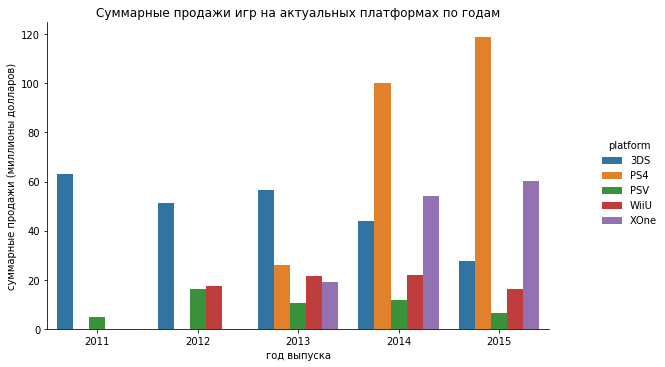

In [53]:
platform_dynam = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                                  games_actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue="platform", kind="bar", data=platform_dynam)
plt.title("Суммарные продажи игр на актуальных платформах по годам", fontsize=12)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=10)
plot.fig.set_size_inches(10,5)

Таким образом, получили потенциально прибыльные в 2017 году платформы: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4.

При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

### Построение боксплотов по наиболее перспективным платформам <a id='step_2.4'></a>

Мы выделили наиболее перспективные платформы, которые будем далее анализировать. Оставим в срезе данных только игры, относящиеся к данным платформам.

In [54]:
profitable_platforms = pd.Series(platform_dynam['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profitable_platforms)==True].reset_index(drop=True)
games_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [55]:
# Создадим таблицу, необходимую для построения боксплотов, исключив ненужные столбцы
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
name_sale.head()

,platform,name,total_sales
0,3DS,Fire Emblem Fates,1.67
1,3DS,Frozen: Olaf's Quest,0.59
2,3DS,12-Sai. Honto no Kimochi,0.07
3,3DS,50 Classic Games,0.01
4,3DS,7th Dragon III Code: VFD,0.16


Построим боксплоты по глобальным продажам каждой игры и разбивкой по платформам.

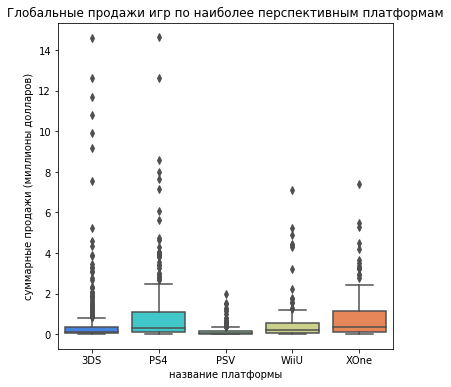

In [56]:
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow')
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

Видим, что на каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велико для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita. 

Сравним показатели по наиболее часто встречающимся значениям: для этого нам интересны среднее, медианное и квартильные значения. Построим график в укрупнённом виде, исключив из визуализации выбивающиеся значения.

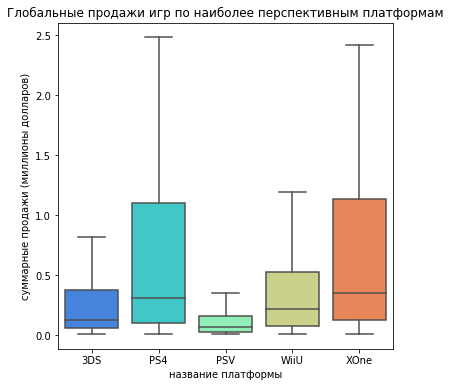

In [57]:
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita.

Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их боксплоты шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

### Связь отзывов и продаж <a id='step_2.5'></a>

#### Популярные платформы

Для того, чтобы изучить влияние отзывов пользователей и критиков на продажи, возьмём самые популярные платформы (исходя из суммарных продаж за последние годы), которые мы выделили ранее: 3DS, Playstation4, PlaystationVita, WiiU и XBoxOne.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

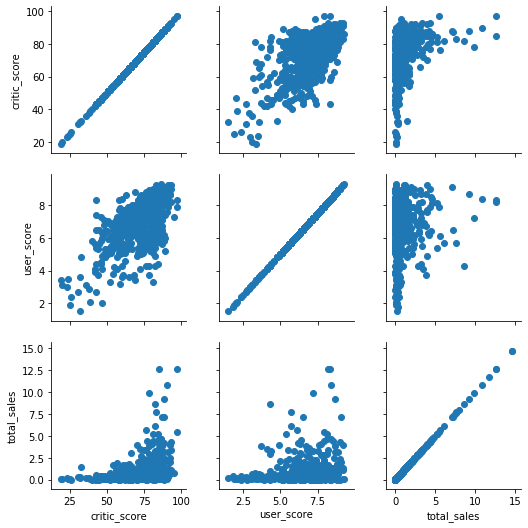

In [58]:
Scaterplots = sns.PairGrid(games_popular[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [59]:
Correlation = games_popular.corr()
Correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.012302,0.039981,-0.061332,0.066248,0.180342,0.079418,0.012636
na_sales,0.012302,1.000000,0.814383,0.420259,0.844934,0.371084,0.061392,0.933230
eu_sales,0.039981,0.814383,1.000000,0.370321,0.936405,0.325290,0.030091,0.925988
jp_sales,-0.061332,0.420259,0.370321,1.000000,0.256919,0.181440,0.211038,0.600657
other_sales,0.066248,0.844934,0.936405,0.256919,1.000000,0.345165,0.027466,0.892621
critic_score,0.180342,0.371084,0.325290,0.181440,0.345165,1.000000,0.617767,0.368631
user_score,0.079418,0.061392,0.030091,0.211038,0.027466,0.617767,1.000000,0.085171
total_sales,0.012636,0.933230,0.925988,0.600657,0.892621,0.368631,0.085171,1.000000


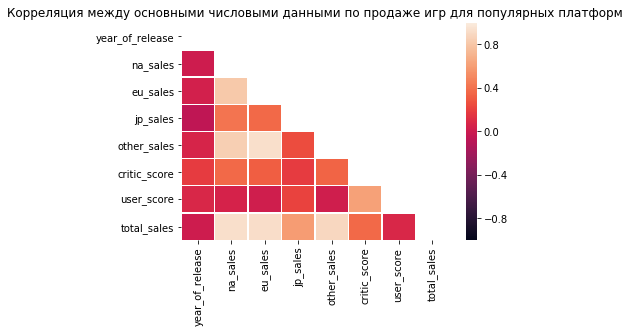

In [60]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(Correlation, dtype=np.bool))
sns.heatmap(Correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между Оценкой критиков и Совокупными продажами составил 0,37 (по региональным продажам этот коэффициент примерно схож и близок к 0,32-0,37; кроме Японии - 0,18), что говорит о небольшой зависимости между этими показателями. Этот же вывод мы можем сделать из диаграммы рассеяния: игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания").

Коэффициент корреляции между Оценкой покупателей и Совокупными продажами составил 0,09, что говорит об отсутствии зависимости между этими показателями. При этом диаграмма рассения схожа с диаграммой рассеяния по оценкам критиков продажам, но имеет больший разброс при низких оценках. Возможно, это связано с тем, что потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. Интересно заметить, что в Японии ситуация несколько иная: корреляция между отзывами потребителей и продажами составляет 21%. Возможно, потребители в этом регионе более ответственно относятся к покупкам, либо имеют схожий вкус, либо не имеют высоких ожиданий при покупке игры (то есть менее привередливы), либо больше доверяют пользователям, чем критикам; либо это связано с ценовой политикой игр, продающихся в Японии (более близкое к ожиданиям соотношение "цена-качество").

Тем не менее, связь оценок с сумммами продаж не является сильной. Соответственно, на продажи игр влияют какие-то иные факторы.

#### Другие платформы

Сравним результаты с продажами игр на других платформах.

In [61]:
games_others = games_actual.loc[games_actual['platform'].isin(profitable_platforms)!=True].reset_index(drop=True)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

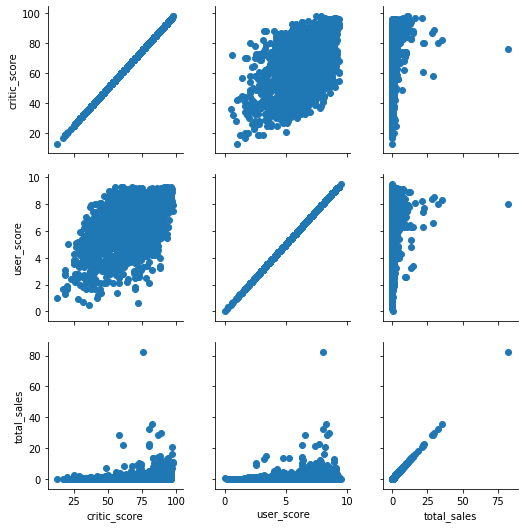

In [62]:
Scaterplots = sns.PairGrid(games_others[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [63]:
Correlation = games_others.corr()
Correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.017218,0.027969,-0.028918,-0.009717,0.123132,-0.158977,-0.004165
na_sales,-0.017218,1.000000,0.877300,0.450082,0.825826,0.218371,0.075059,0.964343
eu_sales,0.027969,0.877300,1.000000,0.478400,0.871491,0.220048,0.064120,0.954811
jp_sales,-0.028918,0.450082,0.478400,1.000000,0.431538,0.133835,0.119592,0.582756
other_sales,-0.009717,0.825826,0.871491,0.431538,1.000000,0.240112,0.086638,0.893080
critic_score,0.123132,0.218371,0.220048,0.133835,0.240112,1.000000,0.575726,0.229494
user_score,-0.158977,0.075059,0.064120,0.119592,0.086638,0.575726,1.000000,0.084108
total_sales,-0.004165,0.964343,0.954811,0.582756,0.893080,0.229494,0.084108,1.000000


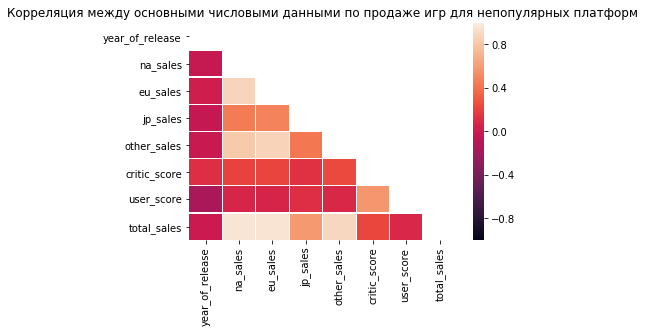

In [64]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для непопулярных платформ")
mask = np.triu(np.ones_like(Correlation, dtype=np.bool))
sns.heatmap(Correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между Оценкой критиков и Совокупными продажами для непопулярных платформ составил 0,23 (по региональным продажам этот коэффициент примерно схож и близок к 0,23, но в Японии составляет 13%), что говорит об еще меньшей зависимости между этими показателями, чем для популярных платформ. Диаграмма рассеяния тоже имеет больше разбросанных значений при средних и низких оценках. Соответственно для игр на непопулярных платформах отзывы критиков менее важны покупателям, чем на популярной платформе. Возможно, это связано и с ценовой политикой. Люди, тратящие большие деньги на игры, более критично относятся к их выбору.

Коэффициент корреляции между Оценкой покупателей и Совокупными продажами составил 0,08, что идентично показателю на популярных платформах. Соответственно, на продажи игр влияют какие-то иные факторы.

### Распределение игр по жанрам <a id='step_2.6'></a>

Построим боксплоты по глобальным продажам каждой игры и разбивкой по жанрам.

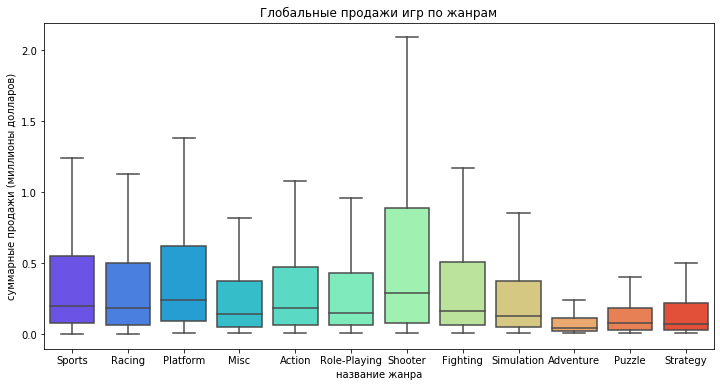

In [65]:
fig = plt.subplots(figsize=(12,6))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

Для выделения наиболее прибыльных жанров и жанров с низкими продажами, выведем таблицу значений по жанрам.

In [66]:
(games_actual
             .pivot_table(index='genre', values='total_sales', aggfunc='sum')
             .sort_values(by='total_sales', ascending=False)
             .reset_index()
)

,genre,total_sales
0,Action,1086.54
1,Sports,770.39
2,Shooter,678.82
3,Misc,552.26
4,Role-Playing,504.22
5,Racing,296.30
6,Platform,276.51
7,Simulation,218.76
8,Fighting,186.95
9,Adventure,137.53


Самым прибыльным жанром является "Экшн", при этом основные покупатели потратили не настолько большую сумму на покупку игр в данном жанре. То есть прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но для спортивных игр характерна та же ситуация, что и для игр в жанре "Экшн": сверхдоходность, скорее всего, связана с продажей каких-то очень дорогих игр,но не является правилом для всего жанра.

Иная ситуация с третьей по доходности позицией: жанром "Шутер". Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи.

Стратегии принесли самый низкий доход, но это не значит, что покупатели приобретают в этом жанре самые дешевые игры, в сравнении с другими жанрами. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры.

Самым неперспективным жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, стоимость.

### Вывод <a id='step_2.7'></a>

В процессе данного этапа исследования было выявлено, что в разные годы были популярны (и соответственно, приносили доход) игры на разных платформах. Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и "сошли на нет" в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. На их смену пришли игры на карманных консолях DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360. Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. В связи с этим, актуальным для анализа срезом данных является период с 2006 по 2015 год.

На основе анализа продаж можем сделать прогноз, что потенциально прибыльными в 2017 году будут платформы: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4. При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велика для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita. По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita. Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их боксплоты шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

При анализе связи между оценкой игры и совокупными продажами было выявлено, что между оценкой критиков и продажами есть слабая связь (во всех регионах, кроме Японии), причём для популярных платформ она чуть сильнее, чем для непопулярных; и между оценкой пользователей и совокупными продажами нет связи (ни для популярных, ни для непопулярных платформ). С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания"). В то же время потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. Поскольку связь оценок с сумммами продаж не является сильной, мы можем сделать вывод, что на продажи игр влияют какие-то иные факторы.

Анализ продаж по жанрам показал, что самым прибыльным жанром является "Экшн", но прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но и для него характерна схожая ситуация. Третьей по доходности позиция - жанр "Шутер". Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи. Самый низкий доход принёс жанр "Стратегия", но это не значит, что покупатели приобретают в этом жанре самые дешевые игры. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры. Самым неперспективным жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, стоимость.

## Этап 3. Портрет пользователя в регионах <a id='step_3'></a>

### Самые популярные платформы <a id='step_3.1'></a>

#### Северная Америка

In [67]:
na_popular_games = (games_actual
                                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_games['na_ratio'] = round(na_popular_games['na_sales'] / sum(na_popular_games['na_sales']), 3)
na_mostpopular_games = na_popular_games.head()
na_mostpopular_games

,platform,na_sales,na_ratio
0,X360,588.15,0.251
1,Wii,486.81,0.208
2,PS3,389.46,0.166
3,DS,324.00,0.138
4,PS2,116.46,0.050


В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры на платформе XBox360, Wii, Playstation3, DS и Playstation2.

Рассмотрим также продаваемость игр на выделенных ранее наиболее перспективных платформах.

In [68]:
na_persp_games = na_popular_games.loc[na_popular_games['platform'].isin(profitable_platforms)==True]
na_persp_games

,platform,na_sales,na_ratio
5,PS4,87.25,0.037
7,XOne,78.85,0.034
8,3DS,78.51,0.034
10,WiiU,36.00,0.015
11,PSV,12.32,0.005


Наиболее популярными играми на перспективных платформах в Северной Америке являются игры на Playstation4, затем - XBoxOne, после них - 3DS, WiiU и, наконец, PlaystationVita.

#### Европа

In [69]:
eu_popular_games = (games_actual
                                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_games['eu_ratio'] = round(eu_popular_games['eu_sales'] / sum(eu_popular_games['eu_sales']), 3)
eu_mostpopular_games = eu_popular_games.head()
eu_mostpopular_games

,platform,eu_sales,eu_ratio
0,PS3,325.95,0.225
1,X360,267.23,0.185
2,Wii,258.21,0.179
3,DS,142.99,0.099
4,PS4,109.31,0.076


В Европе наиболее продаваемыми играми за анализируемый период являются игры на платформе Playstation3, XBox360, Wii, DS и Playstation4.

Рассмотрим также продаваемость игр на выделенных ранее наиболее перспективных платформах (из них Playstation4 попала в ТОП5).

In [70]:
eu_persp_games = eu_popular_games.loc[eu_popular_games['platform'].isin(profitable_platforms)==True]
eu_persp_games

,platform,eu_sales,eu_ratio
4,PS4,109.31,0.076
6,3DS,58.94,0.041
9,XOne,41.96,0.029
10,WiiU,23.65,0.016
11,PSV,12.68,0.009


Наиболее популярными играми на перспективных платформах в Европе являются игры на Playstation4 (попали в ТОП5 по продаваемости из всех платформ за актуальный период), затем - 3DS, после них - XBoxone, WiiU и, наконец, PlaystationVita.

#### Япония

In [71]:
jp_popular_games = (games_actual
                                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_games['jp_ratio'] = round(jp_popular_games['jp_sales'] / sum(jp_popular_games['jp_sales']), 3)
jp_mostpopular_games = jp_popular_games.head()
jp_mostpopular_games

,platform,jp_sales,jp_ratio
0,DS,141.49,0.261
1,3DS,92.59,0.171
2,PS3,78.11,0.144
3,PSP,70.63,0.130
4,Wii,68.28,0.126


В Японии наиболее продаваемыми играми за анализируемый период являются игры на платформе DS, 3DS, Playstation3, PlaystationPortable, Wii.

Рассмотрим также продаваемость игр на выделенных ранее наиболее перспективных платформах (из них 3DS попала в ТОП5 и заняла второе место).

In [72]:
jp_persp_games = jp_popular_games.loc[jp_popular_games['platform'].isin(profitable_platforms)==True]
jp_persp_games

,platform,jp_sales,jp_ratio
1,3DS,92.59,0.171
6,PSV,18.28,0.034
7,WiiU,12.34,0.023
9,PS4,10.22,0.019
11,XOne,0.33,0.001


Наиболее популярными играми на перспективных платформах в Японии являются игры на 3DS (заняла второе место по продаваемости из всех платформ за актуальный период), затем - PlaystationVita, после них - WiiU и, наконец, Playstation4. Игры на платформе XBoxOne в Японии не продаются (возможно, они вовсе не представлены на рынке; либо не пользуются спросом).

#### Сопоставление регионов

Сведём доли продаж по популярным платформам в регионах в единую таблицу и сравним показатели.

In [73]:
mostpopular_games = na_mostpopular_games.merge(eu_mostpopular_games, on=['platform'], how='outer')
mostpopular_games = mostpopular_games.merge(jp_mostpopular_games, on=['platform'], how='outer')
mostpopular_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,NaN,NaN,0.171
1,DS,0.138,0.099,0.261
2,PS2,0.050,NaN,NaN
3,PS3,0.166,0.225,0.144
4,PS4,NaN,0.076,NaN
5,PSP,NaN,NaN,0.130
6,Wii,0.208,0.179,0.126
7,X360,0.251,0.185,NaN


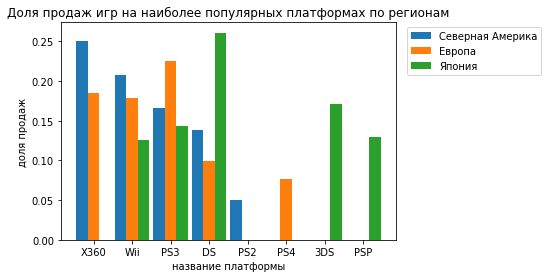

In [74]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на наиболее популярных платформах по регионам',
       xlabel='название платформы', ylabel='доля продаж')
x1 = np.arange(1,9) - 0.3
x2 = np.arange(1,9)
x3 = np.arange(1,9) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', '3DS', 'PSP'])
ax.bar(x1, mostpopular_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, mostpopular_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, mostpopular_games['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

В Северной Америке наиболее популярны игры на платформе XBox360 (доля продаж 25%), на этой же платформе достаточно популярны игры в Европе (18% от всех продаж по региону), а в Японии они не продавались. В Европе самыми популярными являются игры на Playstation3 (23% от продаж по региону), на этой же платформе достаточно популярны игры в Северной Америке (доля продаж 17%) и в Японии (доля подаж 14%). В Японии наиболее продаваемыми являются игры на платформе DS (продажи составили 26%), платформа менее популярна в Северной Америке (14% от всех продаж) и Европе (10% от продаж). Также достаточно популярны во всех регионах игры на платформе Wii: в Северной Америке продажи составили 21% (второе место по популярности среди платформ), в Европе - 18% (делит 2-3 место с XBox360), в Японии - 13% (делит 4-5 место с PlaystationPortable).

Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: Playstation2 для Северной Америки; Playstation4 для Европы; 3DS и PlaystatonPortable для Японии.

Сведём доли продаж по потенциально прибыльным платформам в регионах в единую таблицу и сравним показатели.

In [75]:
persp_games = na_persp_games.merge(eu_persp_games, on=['platform'], how='outer')
persp_games = persp_games.merge(jp_persp_games, on=['platform'], how='outer')
persp_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
persp_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.034,0.041,0.171
1,PS4,0.037,0.076,0.019
2,PSV,0.005,0.009,0.034
3,WiiU,0.015,0.016,0.023
4,XOne,0.034,0.029,0.001


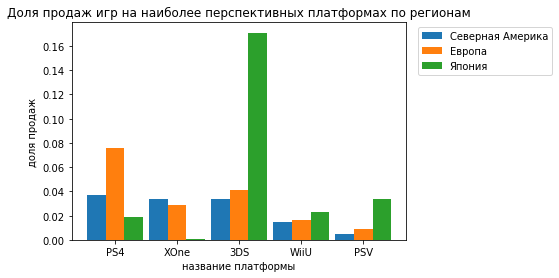

In [76]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на наиболее перспективных платформах по регионам',
       xlabel='название платформы', ylabel='доля продаж')
x1 = np.arange(1,6) - 0.3
x2 = np.arange(1,6)
x3 = np.arange(1,6) + 0.3
plt.xticks([1, 2, 3, 4, 5], ['PS4', 'XOne', '3DS', 'WiiU', 'PSV'])
ax.bar(x1, persp_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, persp_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, persp_games['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

По перспективным для 2017 года платформам наблюдаем следующие распределения долей по продажам в регионах. В Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж, соответственно по регионам). В Японии самой популярной является 3DS (17%), которая в других регионах занимет второе место из перспективных (3% в Северной Америке и 4% в Европе). Также в Северной Америке и Европе популярна платформа XBoxOne, игры на которой не продаются в Японии.

Небольшие процены по продажам говорят о том, что игры на платформах только набирают популярность. Но есть и те, которые при своём росте продаж уже занимают ведущие места среди всех ранее продаваемых платформ (Playstation4 для Европы и 3DS для Японии).

### Самые популярные жанры <a id='step_3.2'></a>

#### Северная Америка

In [77]:
na_popular_genres = (games_actual
                                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_genres['na_ratio'] = round(na_popular_genres['na_sales'] / sum(na_popular_genres['na_sales']), 3)
na_mostpopular_genres = na_popular_genres.head()
na_mostpopular_genres

,genre,na_sales,na_ratio
0,Action,521.15,0.222
1,Sports,389.12,0.166
2,Shooter,356.89,0.152
3,Misc,284.30,0.121
4,Role-Playing,193.74,0.083


В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Спорт", "Шутер", "Прочие", "Ролевые".

#### Европа

In [78]:
eu_popular_genres = (games_actual
                                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_genres['eu_ratio'] = round(eu_popular_genres['eu_sales'] / sum(eu_popular_genres['eu_sales']), 3)
eu_mostpopular_genres = eu_popular_genres.head()
eu_mostpopular_genres

,genre,eu_sales,eu_ratio
0,Action,340.02,0.235
1,Sports,239.55,0.166
2,Shooter,222.99,0.154
3,Misc,146.22,0.101
4,Racing,111.66,0.077


В Европе наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Спорт", "Шутер", "Прочие", "Гонки".

#### Япония

In [79]:
jp_popular_genres = (games_actual
                                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_genres['jp_ratio'] = round(jp_popular_genres['jp_sales'] / sum(jp_popular_genres['jp_sales']), 3)
jp_mostpopular_genres = jp_popular_genres.head()
jp_mostpopular_genres

,genre,jp_sales,jp_ratio
0,Role-Playing,163.77,0.302
1,Action,95.00,0.175
2,Misc,63.49,0.117
3,Sports,48.05,0.089
4,Platform,35.09,0.065


В Японии наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Ролевые", "Экшн", "Прочие", "Спорт", "Платформер".

#### Сопоставление регионов

Сведём доли продаж по популярным жанрам в регионах в единую таблицу и сравним показатели.

In [80]:
mostpopular_genres = na_mostpopular_genres.merge(eu_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres = mostpopular_genres.merge(jp_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_genres.sort_values(by='genre').reset_index(drop=True)

,genre,na_ratio,eu_ratio,jp_ratio
0,Action,0.222,0.235,0.175
1,Misc,0.121,0.101,0.117
2,Platform,NaN,NaN,0.065
3,Racing,NaN,0.077,NaN
4,Role-Playing,0.083,NaN,0.302
5,Shooter,0.152,0.154,NaN
6,Sports,0.166,0.166,0.089


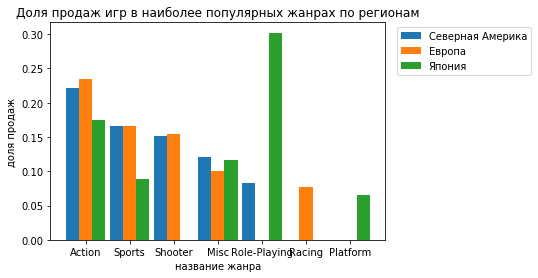

In [81]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр в наиболее популярных жанрах по регионам',
       xlabel='название жанра', ylabel='доля продаж')
x1 = np.arange(1,8) - 0.3
x2 = np.arange(1,8)
x3 = np.arange(1,8) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'Racing', 'Platform'])
ax.bar(x1, mostpopular_genres['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, mostpopular_genres['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, mostpopular_genres['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

Во всех трёх регионах достаточно популярны игры в жанре "Экшн" (22% продаж для Северной Америки, 24% - для Европы, 18% - для Японии). В Японии самыми популярными являются игры в жанре "Ролевые" (30% продаж по региону), в Северной Америке доля продаж игр данного жанра составила 8%, а в Европе они вовсе не пользуются спросом.

Отдельно следует выделить категорию "Прочие" - это те игры, которые по названию жанра не принадлежать ни к одной из основных категорий - они достаточно популярны во всех регионах (доля продаж в регионах около 12% от региональных продаж). Как правило, это социальные игры, игры-шоу, либо игры, предполагающие обучение чему-то (например, достаточно популярная Just Dance - развивающая танцевальные навыки). Популярность этих игр связана с переходом социализации и обучения в сеть; и удобством их использования для современного поколения.

Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: "Гонки" для Европы и "Платформер" для Японии.

Различия в приверженности определённым жанрам могут быть в том числе связаны с различиями в популярности платформ в регионах. К примеру, игры в жанре "Шутер" непопулярны в Японии. Но, возможно, игр в этом жанре не так много на популярном в регионе платформере. В то же время различия в предпочтениях могут быть связаны с культурными особенностями, формирующими предпочтения потребителей. В Северной Америке и Европе очень схожи доли продаж популярных жанров, но и культура достаточно близка; в Японии предпочтения отличаются.

### Влияние рейтинга на продажи <a id='step_3.3'></a>

#### Северная Америка

In [82]:
na_rating_sales = (games_actual
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales['na_ratio'] = round(na_rating_sales['na_sales'] / sum(na_rating_sales['na_sales']), 3)
na_rating_sales

,rating,na_sales,na_ratio
0,E,789.01,0.380
1,M,558.66,0.269
2,T,415.19,0.200
3,E10+,311.60,0.150
4,EC,1.32,0.001
5,RP,0.00,0.000


RP - это игры с рейтингом "Рейтинг ожидается", что равносильно пропущенным значениям. Соответственно, данный рейтинг нам неинтересен.

В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 38% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 27%; на третьем месте игры с рейтингом T ("подросткам") - 20%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 15%; почти не продаются игры с рейтингом EC ("для детей младшего возраста") - 0,1%.

#### Европа

In [83]:
eu_rating_sales = (games_actual
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales['eu_ratio'] = round(eu_rating_sales['eu_sales'] / sum(eu_rating_sales['eu_sales']), 3)
eu_rating_sales

,rating,eu_sales,eu_ratio
0,E,447.48,0.365
1,M,382.36,0.312
2,T,225.65,0.184
3,E10+,169.54,0.138
4,RP,0.03,0.000
5,EC,0.00,0.000


В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 36,5% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 31%; на третьем месте игры с рейтингом T ("подросткам") - 18,4%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 13,8%; нет спроса на игры с рейтингом EC ("для детей младшего возраста").

#### Япония

In [84]:
jp_rating_sales = (games_actual
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales['jp_ratio'] = round(jp_rating_sales['jp_sales'] / sum(jp_rating_sales['jp_sales']), 3)
jp_rating_sales

,rating,jp_sales,jp_ratio
0,E,119.29,0.427
1,T,81.63,0.292
2,M,42.59,0.152
3,E10+,36.12,0.129
4,EC,0.00,0.000
5,RP,0.00,0.000


В Японии наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 42,7% от продаж; на втором месте игры с рейтингом T ("подросткам") - 29,2%; на третьем месте игры с рейтингом M ("для взрослых") - 15,2%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 12,9%; нет спроса на игры с рейтингом EC ("для детей младшего возраста").

Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. В остальном структура похожа. На игры для детей младшего возраста нет спроса ни в одном регионе.

### Вывод <a id='step_3.4'></a>

В Северной Америке наиболее популярны игры на платформе XBox360 (доля продаж 25%), на этой же платформе достаточно популярны игры в Европе (18% от всех продаж по региону), а в Японии они не продавались. В Европе самыми популярными являются игры на Playstation3 (23% от продаж по региону), на этой же платформе достаточно популярны игры в Северной Америке (доля продаж 17%) и в Японии (доля подаж 14%). В Японии наиболее продаваемыми являются игры на платформе DS (продажи составили 26%), платформа менее популярна в Северной Америке (14% от всех продаж) и Европе (10% от продаж). Также достаточно популярны во всех регионах игры на платформе Wii: в Северной Америке продажи составили 21% (второе место по популярности среди платформ), в Европе - 18% (делит 2-3 место с XBox360), в Японии - 13% (делит 4-5 место с PlaystationPortable). Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: Playstation2 для Северной Америки; Playstation4 для Европы; 3DS и PlaystatonPortable для Японии.

По перспективным для 2017 года платформам наблюдаем следующие распределения долей по продажам в регионах. В Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж, соответственно по регионам). В Японии самой популярной является 3DS (17%), которая в других регионах занимет второе место из перспективных (3% в Северной Америке и 4% в Европе). Также в Северной Америке и Европе популярна платформа XBoxOne, игры на которой не продаются в Японии. Небольшие процены по продажам говорят о том, что игры на платформах только набирают популярность. Но есть и те, которые при своём росте продаж уже занимают ведущие места среди всех ранее продаваемых платформ (Playstation4 для Европы и 3DS для Японии).

Во всех трёх регионах достаточно популярны игры в жанре "Экшн" (22% продаж для Северной Америки, 24% - для Европы, 18% - для Японии). В Японии самыми популярными являются игры в жанре "Ролевые" (30% продаж по региону), в Северной Америке доля продаж игр данного жанра составила 8%, а в Европе они вовсе не пользуются спросом. Отдельно следует выделить категорию "Прочие" - это те игры, которые по названию жанра не принадлежать ни к одной из основных категорий - они достаточно популярны во всех регионах (доля продаж в регионах около 12% от региональных продаж). Как правило, это социальные игры, игры-шоу, либо игры, предполагающие обучение чему-то (например, достаточно популярная Just Dance - развивающая танцевальные навыки). Популярность этих игр связана с переходом социализации и обучения в сеть; и удобством их использования для современного поколения. Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: "Гонки" для Европы и "Платформер" для Японии.

Различия в приверженности определённым жанрам могут быть в том числе связаны с различиями в популярности платформ в регионах. К примеру, игры в жанре "Шутер" непопулярны в Японии. Но, возможно, игр в этом жанре не так много на популярном в регионе платформере. В то же время различия в предпочтениях могут быть связаны с культурными особенностями, формирующими предпочтения потребителей. В Северной Америке и Европе очень схожи доли продаж популярных жанров, но и культура достаточно близка; в Японии предпочтения отличаются.

В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 38% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 27%; на третьем месте игры с рейтингом T ("подросткам") - 20%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 15%; почти не продаются игры с рейтингом EC ("для детей младшего возраста") - 0,1%. В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 36,5% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 31%; на третьем месте игры с рейтингом T ("подросткам") - 18,4%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 13,8%; нет спроса на игры с рейтингом EC ("для детей младшего возраста"). В Японии наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 42,7% от продаж; на втором месте игры с рейтингом T ("подросткам") - 29,2%; на третьем месте игры с рейтингом M ("для взрослых") - 15,2%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 12,9%; нет спроса на игры с рейтингом EC ("для детей младшего возраста").

Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. В остальном структура похожа. На игры для детей младшего возраста нет спроса ни в одном регионе.

## Этап 4. Проверка статистических гипотез <a id='step_4'></a>

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC <a id='step_4.1'></a>

Мы будем анализировать две генеральные совокупности: рейтинг пользователей игр на платформе XBoxOne (xboxone_games) и PC (pc_games).

In [85]:
xboxone_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "XOne")]
pc_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "PC")]

Прежде чем формулировать или проверять статистические гипотезы, удостоверимся, что сравниваемые наборы имеют нормальное распределение.

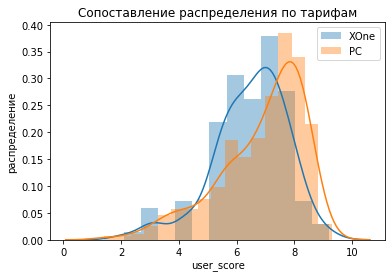

In [86]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по тарифам')
sns.distplot(xboxone_games['user_score'], label='XOne')
sns.distplot(pc_games['user_score'], label='PC')
plt.legend()
plt.show()

Данные распределены нормально, хоть и смещены вправо.

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

Несмотря на то, что xboxone_games и pc_games - это не совсем генеральные совокупности, а скорее, выборки; но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [87]:
sample_1 = xboxone_games['user_score']
sample_2 = pc_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.003919849356846717
Отвергаем нулевую гипотезу.


Получили результат: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

Вывод: средние пользовательские рейтинги платформ Xbox One и PC различаются.

### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports <a id='step_4.2'></a>

Мы будем анализировать две генеральные совокупности: рейтинг пользователей игр в жанре Action (action_games) и Sports (sports_games).

In [88]:
action_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Action")]
sports_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Sports")]

Прежде чем формулировать или проверять статистические гипотезы, удостоверимся, что сравниваемые наборы имеют нормальное распределение.

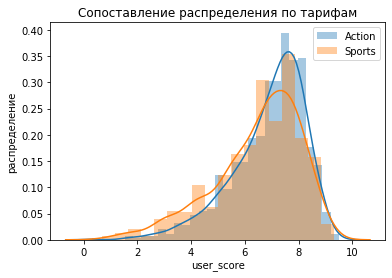

In [89]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по тарифам')
sns.distplot(action_games['user_score'], label='Action')
sns.distplot(sports_games['user_score'], label='Sports')
plt.legend()
plt.show()

Данные, хоть и немного смещены вправо, имеют нормальное распределение.

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

Несмотря на то, что action_games и sports_games - это не совсем генеральные совокупности, а скорее, выборки; но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [90]:
sample_1 = action_games['user_score']
sample_2 = sports_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 1.8948270159749066e-08
Отвергаем нулевую гипотезу.


Получили результат: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

Вывод: средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод <a id='step_4.3'></a>

Были проведены t-тесты проверки двусторонних гипотез для двух независимых выборок. В результате данных тестов было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются; и средние пользовательские рейтинги жанров Action и Sports также различаются.

## Общий вывод <a id='step_5'></a>

Было проведено исследование рынка компьютерных игр, на который ориентируется в своей деятельности интернет-магазин «Стримчик», продающий игр по всему миру. Во время предобработки данных была обнаружена интересная тенденция: **количество игр, для которых нет оценки критиков по годам выпуска практически соответствует количеству игр, для которых нет оценки пользователей, и количеству игр, для которых нет рейтинга от организации ESRB**. Характерная динамика показателей может быть связана с тем, что игр стало выходить больше - соответственно, пользователи "распылились" между играми, не имея возможности оценить все из них. Также возникло большее количество платформ - часть пользователей, имеющая возможность поиграть на одной из платформ, не может позволить себе другие платформы. А некоторые из игр являются неэксклюзивными только для одной платформы, а встречаются на всех платформах, соответственно, могут быть неоценены пользователями, критиками и ESRB. Также часть пропусков за последние годы связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже). Что касается пропусков в оценках критиков и рейтинге ESRB, возможно, часть игр также не была сведена в оценку и рейтинг на момент выгрузки (оценка и рейтинг появятся немного позже). Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игре, а наиболее ожидаемые и пользующиеся спросом игры, либо игре в целом - только на одной из платформ. Также возможно, что данные по оценкам и рейтингу отсутствуют в открытом доступе.

Исследовательский анализ показал, что **в разные годы были популярны** (и соответственно, приносили доход) **игры на разных платформах**. Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и "сошли на нет" в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. На их смену пришли игры на карманных консолях DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360. Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. На основе анализа продаж можем сделать прогноз, что **потенциально прибыльными в 2017 году будут платформы**: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4. При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения. На данных платформах игры выходили в период с 2011 года, поэтому актуальным для анализа срезом данных является **период с 2011 по 2015 год**.

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, **разница в суммарных продажах игр в рамках каждой из платформ** очень велика для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita. По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita. Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их боксплоты шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

При анализе связи между оценкой игры и совокупными продажами было выявлено, что **между оценкой критиков и продажами есть слабая связь (во всех регионах, кроме Японии), причём для популярных платформ она чуть сильнее, чем для непопулярных; и между оценкой пользователей и совокупными продажами нет связи (ни для популярных, ни для непопулярных платформ)**. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания"). В то же время потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. Поскольку связь оценок с сумммами продаж не является сильной, мы можем сделать вывод, что на продажи игр влияют какие-то иные факторы.

Анализ продаж по жанрам показал, что **самым прибыльным жанром является "Экшн"**, но прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. **На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт"**, но и для него характерна схожая ситуация. **Третьей по доходности позиция - жанр "Шутер"**. Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи. Самый низкий доход принёс жанр "Стратегия", но это не значит, что покупатели приобретают в этом жанре самые дешевые игры. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры. Самым неперспективным жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, стоимость.

Далее был составлен **портрет пользователя в каждом регионе**. В Северной Америке наиболее популярны игры на платформе XBox360 (доля продаж 25%), на этой же платформе достаточно популярны игры в Европе (18% от всех продаж по региону), а в Японии они не продавались. В Европе самыми популярными являются игры на Playstation3 (23% от продаж по региону), на этой же платформе достаточно популярны игры в Северной Америке (доля продаж 17%) и в Японии (доля подаж 14%). В Японии наиболее продаваемыми являются игры на платформе DS (продажи составили 26%), платформа менее популярна в Северной Америке (14% от всех продаж) и Европе (10% от продаж). Также достаточно популярны во всех регионах игры на платформе Wii: в Северной Америке продажи составили 21% (второе место по популярности среди платформ), в Европе - 18% (делит 2-3 место с XBox360), в Японии - 13% (делит 4-5 место с PlaystationPortable). Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: Playstation2 для Северной Америки; Playstation4 для Европы; 3DS и PlaystatonPortable для Японии. По перспективным для 2017 года платформам наблюдаем следующие распределения долей по продажам в регионах. В Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж, соответственно по регионам). В Японии самой популярной является 3DS (17%), которая в других регионах занимет второе место из перспективных (3% в Северной Америке и 4% в Европе). Также в Северной Америке и Европе популярна платформа XBoxOne, игры на которой не продаются в Японии. Небольшие процены по продажам говорят о том, что игры на платформах только набирают популярность. Но есть и те, которые при своём росте продаж уже занимают ведущие места среди всех ранее продаваемых платформ (Playstation4 для Европы и 3DS для Японии).

**Во всех трёх регионах достаточно популярны игры в жанре "Экшн"** (22% продаж для Северной Америки, 24% - для Европы, 18% - для Японии). В Японии самыми популярными являются игры **в жанре "Ролевые"** (30% продаж по региону), в Северной Америке доля продаж игр данного жанра составила 8%, а в Европе они вовсе не пользуются спросом. Отдельно следует выделить **категорию "Прочие"** - это те игры, которые по названию жанра не принадлежать ни к одной из основных категорий - они достаточно популярны во всех регионах (доля продаж в регионах около 12% от региональных продаж). Как правило, это социальные игры, игры-шоу, либо игры, предполагающие обучение чему-то (например, достаточно популярная Just Dance - развивающая танцевальные навыки). Популярность этих игр связана с переходом социализации и обучения в сеть; и удобством их использования для современного поколения. Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: "Гонки" для Европы и "Платформер" для Японии. Различия в приверженности определённым жанрам могут быть в том числе связаны с различиями в популярности платформ в регионах. К примеру, игры в жанре "Шутер" непопулярны в Японии. Но, возможно, игр в этом жанре не так много на популярном в регионе платформере. В то же время различия в предпочтениях могут быть связаны с культурными особенностями, формирующими предпочтения потребителей. В Северной Америке и Европе очень схожи доли продаж популярных жанров, но и культура достаточно близка; в Японии предпочтения отличаются.

В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 38% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 27%; на третьем месте игры с рейтингом T ("подросткам") - 20%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 15%; почти не продаются игры с рейтингом EC ("для детей младшего возраста") - 0,1%. В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 36,5% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 31%; на третьем месте игры с рейтингом T ("подросткам") - 18,4%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 13,8%; нет спроса на игры с рейтингом EC ("для детей младшего возраста"). В Японии наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 42,7% от продаж; на втором месте игры с рейтингом T ("подросткам") - 29,2%; на третьем месте игры с рейтингом M ("для взрослых") - 15,2%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 12,9%; нет спроса на игры с рейтингом EC ("для детей младшего возраста"). Таким образом, **в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. В остальном структура похожа. На игры для детей младшего возраста нет спроса ни в одном регионе.**

Кроме того, были проведены t-тесты, в результате которых было выявлено, что **средние пользовательские рейтинги платформ Xbox One и PC различаются; и средние пользовательские рейтинги жанров Action и Sports также различаются.**

## Рекомендации <a id='step_6'></a>

Таким образом, для того, чтобы спланировать рекламные кампании на 2017 г., интернет-магазину "Стримчик" предложены **следующие рекомендации**:

1. Не ориентироваться при продаже игр на пользовательские оценки; не придавать большого значения оценкам критиков, но принимать их во внимание.

2. Учитывать, что срок устаревания платформы составляет 8-10 лет; не выставлять на продажу игры на платформах, для которых этот срок приближается к 6-8 годам (основной доход можно получить от продаж игр на платформах, вышедших до 6 лет назад).

3. Диверсифицировать продажи игр по платформам (наблюдается тенденция популярности среди пользователей различных платформ) следующим образом: продавать игры на платформах XBoxOne и PlayStation4 (это потенциально самые доходные платформы); а также на платформах 3DS, PlaystationVita, WiiU (менее популярные, но потенциально доходные платформы). 

4. Продажа игр по платформам в разрезе регионов должна осуществляться следующим образом: в Северной Америкеи Европе следует продавать игры на Playstation4 и XboxOne, делая акцент на играх в жанре "Экшн" (как самых прибыльных) и "Шутер" (как самых стабильных по продажам); в Японии следует продавать игры на 3DS, делая акцент на играх в жанрах "Ролевые".

5. В каждом из регионов рекомендуется осуществлять продажи игр с рейтингом E ("для всех"). В Северной Америке и Европе также возможны высокие продажи игр с рейтингом M ("для взрослых"), а в Японии - с рейтингом T ("для подростков").